In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Problem Statement

###  Domain: Health Insurance
-  Data Description:
- age: Age of primary beneficiary
- sex: Insurance contractor gender, female / male
- bmi: Body mass index, providing an understanding of body, weights that are - relatively high or low relative to height, objective index of body weight (kg /  m2
 ) using the ratio of height to weight, ideally 18.5 to 24.9
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoker / Non - smoker
- region: The beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: Individual medical costs billed by health insurance.

# EDA

# 1- Data  Reading & Understanding

In [3]:
df=pd.read_csv("data/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [7]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
123,44,male,31.350,1,yes,northeast,39556.49450
1314,30,female,23.655,3,yes,northwest,18765.87545
167,32,female,33.155,3,no,northwest,6128.79745
1207,36,male,33.400,2,yes,southwest,38415.47400
533,37,male,36.190,0,no,southeast,19214.70553


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


- Age is Normally Distributed
- charges is right-skewed mean > median


In [9]:
IQR_charges=16639.912515-4740.287150
4740.287150-(1.5*IQR_charges)

-13109.1508975

In [10]:
16639.912515+(1.5*IQR_charges)

34489.350562499996

In [11]:
df.describe(include="object")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


# 2. Check for Dtypes

In [12]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [13]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [14]:
dtypes=df.dtypes
n_unique=df.nunique()
pd.DataFrame({"Dtypes":dtypes,"Nuiq":n_unique}).T

,age,sex,bmi,children,smoker,region,charges
Dtypes,int64,object,float64,int64,object,object,float64
Nuiq,47,2,548,6,2,4,1337


In [15]:
dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [16]:
n_unique

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

# Check Null Values

In [17]:
pd.DataFrame(df.isnull().sum()).T

,age,sex,bmi,children,smoker,region,charges
0,0,0,0,0,0,0,0


In [18]:
# import missingno as msno

In [19]:
# msno.bar(df,color="green")

# Detecting Outliers

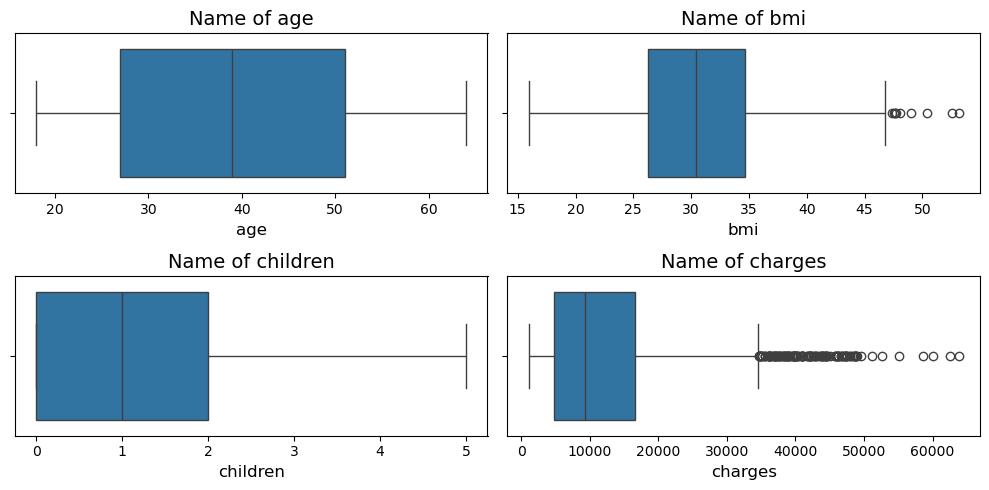

In [20]:
num_cols=df.select_dtypes(include=["number"]).columns
plt.figure(figsize=(10,5))
for index,col in enumerate(num_cols,start=1):
  plt.subplot(2,2,index)
  plt.title(f"Name of {col}",fontsize=14)
  sns.boxplot(x=df[col])
  plt.xlabel(col,fontsize=12)
plt.tight_layout()
plt.show()

# Duplicates

In [21]:
df.duplicated().sum()

1

# Data Preprocessing

# Change Data types

In [22]:
cat_cols=["smoker","sex","region"]
df[cat_cols]=df[cat_cols].astype("category")

In [23]:
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

# Outliers
- Replace
- Remove

In [24]:
# Q1=df["bmi"].quantile(0.25)
# Q3=df["bmi"].quantile(0.75)
# IQR=Q3-Q1
# upper=Q3+1.5*IQR
# upper_outliers=df[df["bmi"]>upper]["bmi"].values
# df["bmi"]=df['bmi'].replace(upper_outliers,upper)

In [25]:
# plt.figure(figsize=(5,1))
# sns.boxplot(x=df["bmi"])
# plt.show()

# Remove Outliers

In [26]:
Q1=df["bmi"].quantile(0.25)
Q3=df["bmi"].quantile(0.75)
IQR=Q3-Q1
upper=Q3+1.5*IQR
df=df[df["bmi"]<=upper]

In [27]:
df.reset_index(drop=True,inplace=True)

In [28]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1324,50,male,30.970,3,no,northwest,10600.54830
1325,18,female,31.920,0,no,northeast,2205.98080
1326,18,female,36.850,0,no,southeast,1629.83350
1327,21,female,25.800,0,no,southwest,2007.94500


# EDA

# Visualization

In [29]:
num_cols=["age","bmi","children"]
cat_cols=["sex","smoker","region"]

# Numerical Features

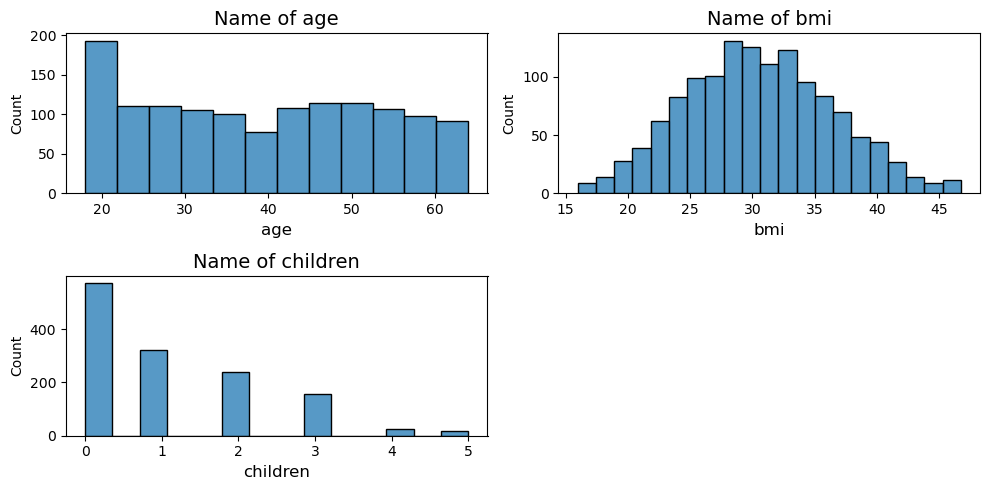

In [30]:
plt.figure(figsize=(10,5))
for index,col in enumerate(num_cols,start=1):
  plt.subplot(2,2,index)
  plt.title(f"Name of {col}",fontsize=14)
  sns.histplot(x=df[col])
  plt.xlabel(col,fontsize=12)
plt.tight_layout()
plt.show()

In [31]:
df.skew(numeric_only=True)

age         0.058413
bmi         0.157180
children    0.936628
charges     1.500577
dtype: float64

# Categorical Features

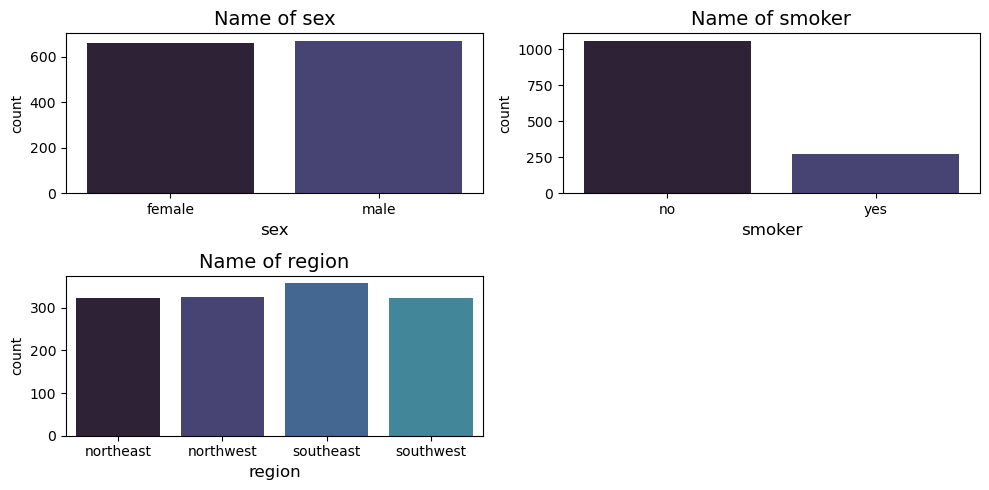

In [32]:
plt.figure(figsize=(10,5))
for index,col in enumerate(cat_cols,start=1):
  plt.subplot(2,2,index)
  plt.title(f"Name of {col}",fontsize=14)
  sns.countplot(x=df[col],palette=sns.color_palette("mako"))
  plt.xlabel(col,fontsize=12)
plt.tight_layout()
plt.show()

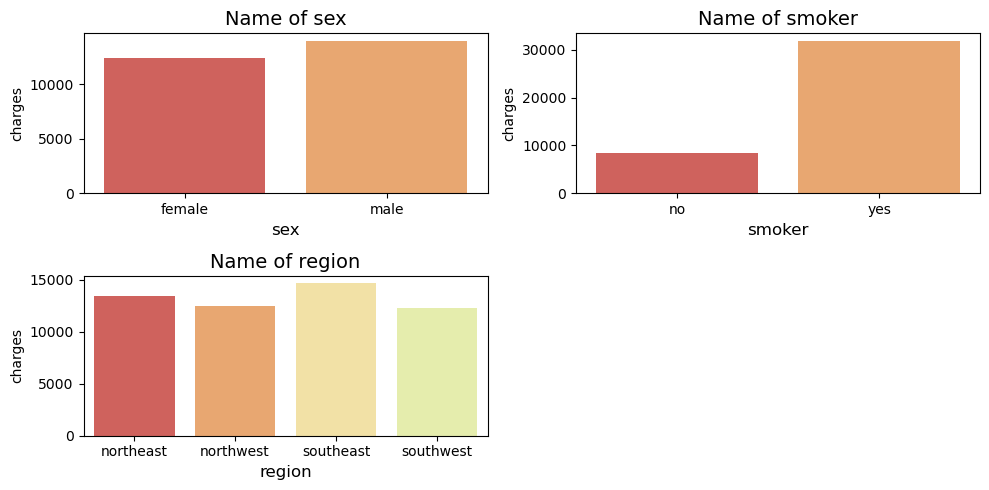

In [33]:
plt.figure(figsize=(10,5))
for index,col in enumerate(cat_cols,start=1):
  plt.subplot(2,2,index)
  plt.title(f"Name of {col}",fontsize=14)
  sns.barplot(x=df[col],y=df["charges"],palette=sns.color_palette("Spectral"),ci=None)
  plt.xlabel(col,fontsize=12)
plt.tight_layout()
plt.show()

# Relation between each feature and Target

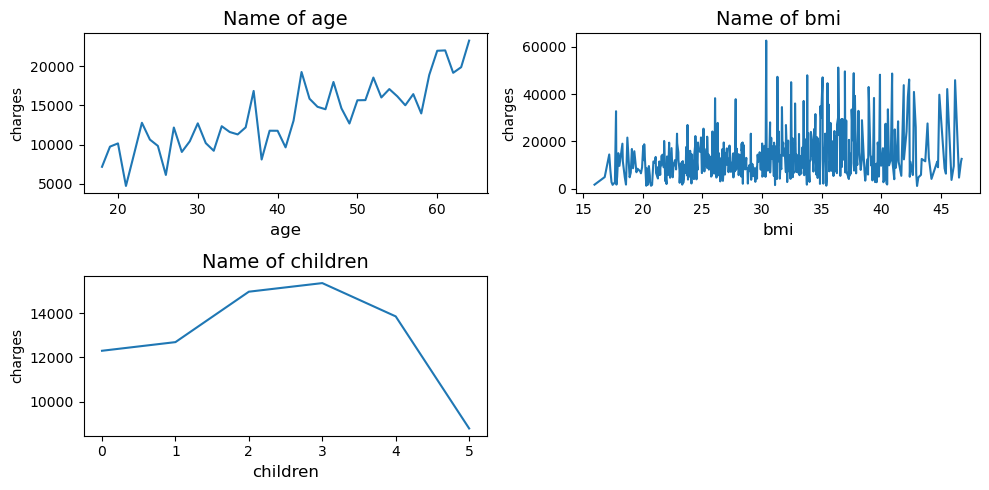

In [34]:
plt.figure(figsize=(10,5))
for index,col in enumerate(num_cols,start=1):
  plt.subplot(2,2,index)
  plt.title(f"Name of {col}",fontsize=14)
  sns.lineplot(x=df[col],y=df['charges'],ci=None)
  plt.xlabel(col,fontsize=12)
plt.tight_layout()
plt.show()

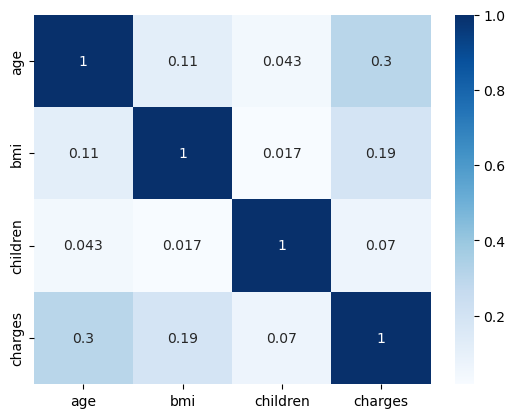

In [35]:
corr=df.corr(numeric_only=True)
sns.heatmap(corr,annot=True,cmap="Blues")
plt.show()

# Splitting Data & Encoding

In [36]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1324,50,male,30.970,3,no,northwest,10600.54830
1325,18,female,31.920,0,no,northeast,2205.98080
1326,18,female,36.850,0,no,southeast,1629.83350
1327,21,female,25.800,0,no,southwest,2007.94500


In [37]:
X=df.drop(columns="charges")
y=df["charges"]

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
from sklearn.preprocessing import OrdinalEncoder

In [40]:
cols_to_encode=["sex","smoker"]
categories_list=[["male","female"],["yes","no"]]
ordinal_encoder=OrdinalEncoder(categories=categories_list)
X_train[cols_to_encode]=ordinal_encoder.fit_transform(X_train[cols_to_encode])
X_test[cols_to_encode]=ordinal_encoder.transform(X_test[cols_to_encode])

In [41]:
X_train

,age,sex,bmi,children,smoker,region
844,55,0.0,32.775,0,1.0,northwest
170,49,0.0,30.300,0,1.0,southwest
942,42,0.0,31.255,0,1.0,northwest
461,19,0.0,25.175,0,1.0,northwest
209,20,0.0,33.000,1,1.0,southwest
...,...,...,...,...,...,...
1095,58,0.0,36.080,0,1.0,southeast
1130,33,0.0,30.250,0,1.0,southeast
1294,25,1.0,20.800,1,1.0,southwest
860,18,0.0,37.290,0,1.0,southeast


In [42]:
pip install category_encoders

In [43]:
from category_encoders import  OneHotEncoder
encoder=OneHotEncoder(cols=["region"],use_cat_names=True)
X_train=encoder.fit_transform(X_train)
X_test=encoder.transform(X_test)

In [44]:
X_train

,age,sex,bmi,children,smoker,region_northwest,region_southwest,region_northeast,region_southeast
844,55,0.0,32.775,0,1.0,1,0,0,0
170,49,0.0,30.300,0,1.0,0,1,0,0
942,42,0.0,31.255,0,1.0,1,0,0,0
461,19,0.0,25.175,0,1.0,1,0,0,0
209,20,0.0,33.000,1,1.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1095,58,0.0,36.080,0,1.0,0,0,0,1
1130,33,0.0,30.250,0,1.0,0,0,0,1
1294,25,1.0,20.800,1,1.0,0,1,0,0
860,18,0.0,37.290,0,1.0,0,0,0,1


# Normalization

In [45]:
num_cols=["age","bmi"]

In [46]:
from sklearn.preprocessing import  MinMaxScaler
scaler=MinMaxScaler()
X_train[num_cols]=scaler.fit_transform(X_train[num_cols])
X_test[num_cols]=scaler.transform(X_test[num_cols])

In [47]:
X_train

,age,sex,bmi,children,smoker,region_northwest,region_southwest,region_northeast,region_southeast
844,0.804348,0.0,0.547007,0,1.0,1,0,0,0
170,0.673913,0.0,0.466493,0,1.0,0,1,0,0
942,0.521739,0.0,0.497560,0,1.0,1,0,0,0
461,0.021739,0.0,0.299772,0,1.0,1,0,0,0
209,0.043478,0.0,0.554327,1,1.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1095,0.869565,0.0,0.654522,0,1.0,0,0,0,1
1130,0.326087,0.0,0.464867,0,1.0,0,0,0,1
1294,0.152174,1.0,0.157450,1,1.0,0,1,0,0
860,0.000000,0.0,0.693884,0,1.0,0,0,0,1


In [48]:
from DataCleaning import DataCleaningClass

In [49]:
dataclean=DataCleaningClass()

In [50]:
dataclean.data_info(df)

,Column,Data Type,No of Null,No of Uniques,Duplicates
0,age,int64,0,47,1
1,sex,category,0,2,1
2,bmi,float64,0,539,1
3,children,int64,0,6,1
4,smoker,category,0,2,1
5,region,category,0,4,1
6,charges,float64,0,1328,1


In [51]:
df["bmi"]

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1324    30.970
1325    31.920
1326    36.850
1327    25.800
1328    29.070
Name: bmi, Length: 1329, dtype: float64

In [52]:
dataclean.replace_outliers_with_fences(df,["bmi","age"])

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1324,50,male,30.970,3,no,northwest,10600.54830
1325,18,female,31.920,0,no,northeast,2205.98080
1326,18,female,36.850,0,no,southeast,1629.83350
1327,21,female,25.800,0,no,southwest,2007.94500


In [59]:
df[["bmi","age","sex"]]

,bmi,age,sex
0,27.900,19,female
1,33.770,18,male
2,33.000,28,male
3,22.705,33,male
4,28.880,32,male
...,...,...,...
1324,30.970,50,male
1325,31.920,18,female
1326,36.850,18,female
1327,25.800,21,female


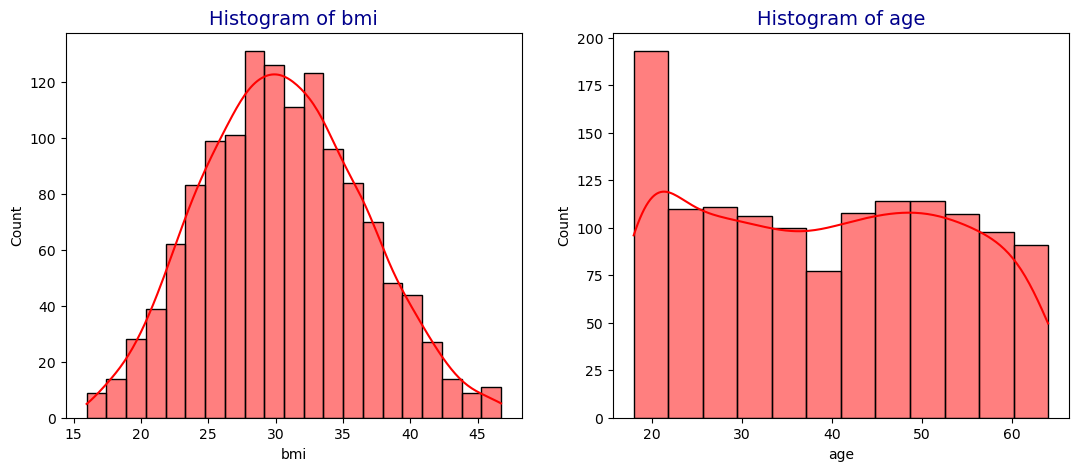

In [55]:
dataclean.columns_histplot(df[["bmi","age"]])